In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("move-data.csv")

In [3]:
df.columns

Index(['Index', 'Name', 'Type', 'Category', 'Contest', 'PP', 'Power',
       'Accuracy', 'Generation'],
      dtype='object')

In [4]:
df.dtypes

Index           int64
Name           object
Type           object
Category       object
Contest        object
PP              int64
Power         float64
Accuracy      float64
Generation      int64
dtype: object

In [5]:
df.describe()

,Index,PP,Power,Accuracy,Generation
count,728.000000,728.000000,414.000000,448.000000,728.000000
mean,364.500000,14.162088,81.173913,96.004464,3.679945
std,210.299786,8.817177,40.278013,8.226110,2.084998
min,1.000000,1.000000,10.000000,50.000000,1.000000
25%,182.750000,10.000000,60.000000,95.000000,2.000000
50%,364.500000,10.000000,80.000000,100.000000,4.000000
75%,546.250000,20.000000,100.000000,100.000000,5.000000
max,728.000000,40.000000,250.000000,100.000000,7.000000


In [6]:
import matplotlib.pyplot as plt
df.dropna(how='any')
df.loc[df['Power'] == "None"]
print('Number of moves: ', len(df))
df.sample()
df.columns = ['index', 'name', 'type', 'category', 'contest', 'pp', 'power', 'accuracy', 'generation']
df.set_index('index')
df['power'].replace('None', 0, inplace=True)
df['accuracy'].replace('None', 100, inplace=True)
df['power'] = pd.to_numeric(df['power'])
df['accuracy'] = pd.to_numeric(df['accuracy'])

df = df[(df.pp != 1) | (df.name == 'Sketch')]

df.sample()

Number of moves:  728


C:\Users\Akash\AppData\Local\Temp\ipykernel_18008\4159101784.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['power'].replace('None', 0, inplace=True)
C:\Users\Akash\AppData\Local\Temp\ipykernel_18008\4159101784.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

,index,name,type,category,contest,pp,power,accuracy,generation
13,14,Swords Dance,Normal,Status,Beautiful,20,NaN,NaN,1


In [7]:
df.groupby('power').size()

power
10.0      2
15.0      8
18.0      2
20.0      9
25.0      7
30.0      7
35.0      6
40.0     34
45.0      1
50.0     19
55.0      7
60.0     38
65.0     24
70.0     24
75.0     15
80.0     44
85.0     12
90.0     34
95.0      5
100.0    31
110.0     8
120.0    26
125.0     1
130.0     9
140.0     8
150.0    13
160.0     1
180.0     1
200.0     1
250.0     1
dtype: int64

C:\Users\Akash\AppData\Local\Temp\ipykernel_18008\2406760222.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'type', data=df, palette="Spectral")


<Axes: title={'center': 'Full Count'}, xlabel='Types', ylabel='Count'>

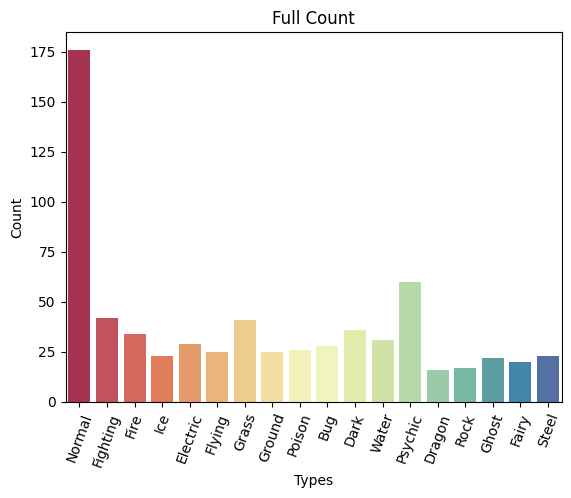

In [123]:
plt.xticks(rotation=70)
plt.ylabel('Count')
plt.xlabel('Types')
plt.title('Full Count')

sns.countplot(x= 'type', data=df, palette="Spectral")






<Axes: title={'center': 'Special'}, xlabel='Types', ylabel='Count'>

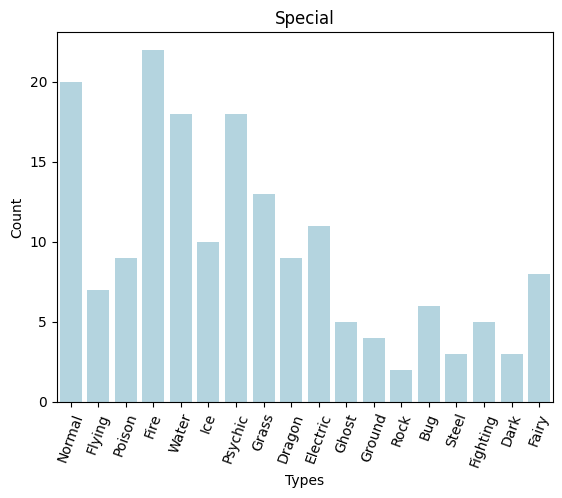

In [124]:
df_sp = df[df.category == "Special"]
plt.xticks(rotation=70)
plt.ylabel('Count')
plt.xlabel('Types')
plt.title('Special')

sns.countplot(x= 'type', data=df_sp, color="lightblue")


<Axes: title={'center': 'Physical'}, xlabel='Types', ylabel='Count'>

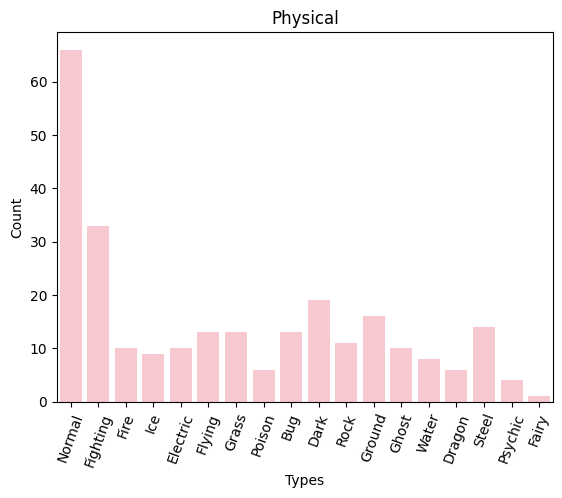

In [125]:
df_ph = df[df.category == "Physical"]
plt.xticks(rotation=70)
plt.ylabel('Count')
plt.xlabel('Types')
plt.title('Physical')

sns.countplot(x= 'type', data=df_ph, color="pink")


<Axes: title={'center': 'Status'}, xlabel='Types', ylabel='Count'>

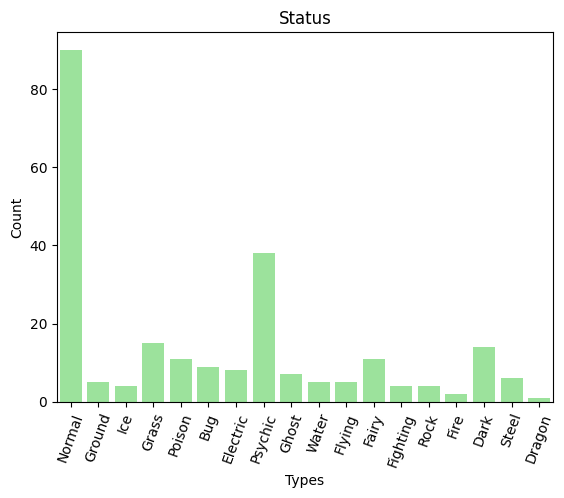

In [126]:
df_st = df[df.category == "Status"]
plt.xticks(rotation=70)
plt.ylabel('Count')
plt.xlabel('Types')
plt.title('Status')

sns.countplot(x= 'type', data=df_st, color="lightgreen")

In [9]:
df_move = df[df['type'] == 'Ice']

Text(0.5, 0, 'name')

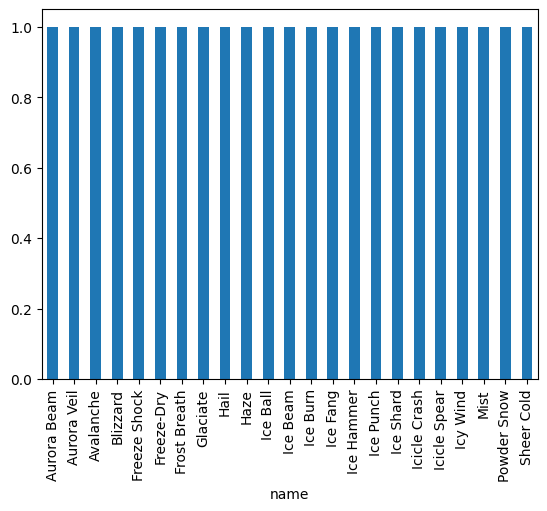

In [10]:
df_move.groupby('name').size().plot(kind='bar')
plt.xlabel('name')

In [11]:
import seaborn as sns


In [12]:
df['Efficiency'] = pd.to_numeric(df['power']/df['pp'])

In [13]:
df.dtypes

index           int64
name           object
type           object
category       object
contest        object
pp              int64
power         float64
accuracy      float64
generation      int64
Efficiency    float64
dtype: object

In [14]:
df.head()

,index,name,type,category,contest,pp,power,accuracy,generation,Efficiency
0,1,Pound,Normal,Physical,Tough,35,40.0,100.0,1,1.142857
1,2,Karate Chop,Fighting,Physical,Tough,25,50.0,100.0,1,2.000000
2,3,Double Slap,Normal,Physical,Cute,10,15.0,85.0,1,1.500000
3,4,Comet Punch,Normal,Physical,Tough,15,18.0,85.0,1,1.200000
4,5,Mega Punch,Normal,Physical,Tough,20,80.0,85.0,1,4.000000


In [15]:
df_movefire = df[df['type'] == 'Fire']
df_movefire.groupby('Efficiency').size()

Efficiency
1.600000     1
2.333333     1
2.400000     1
2.500000     1
4.000000     1
4.333333     1
4.666667     1
5.000000     1
5.333333     2
6.000000     1
7.500000     1
8.000000     3
8.500000     1
9.500000     1
20.000000    5
22.000000    1
26.000000    3
30.000000    4
36.000000    1
dtype: int64

<Axes: xlabel='name', ylabel='Efficiency'>

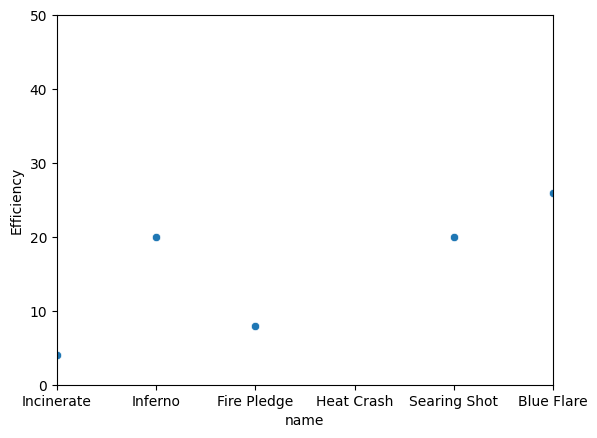

In [16]:
plt.axis([20,25,0,50])
sns.scatterplot(x= 'name', y='Efficiency', data=df_movefire)

In [17]:
print('wsfs')

wsfs


C:\Users\Akash\AppData\Local\Temp\ipykernel_18008\2725066485.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'type', y='power', data=df, palette=datacolor)


<Axes: title={'center': 'Move Power based on Type'}, xlabel='Types', ylabel='Average power of moves'>

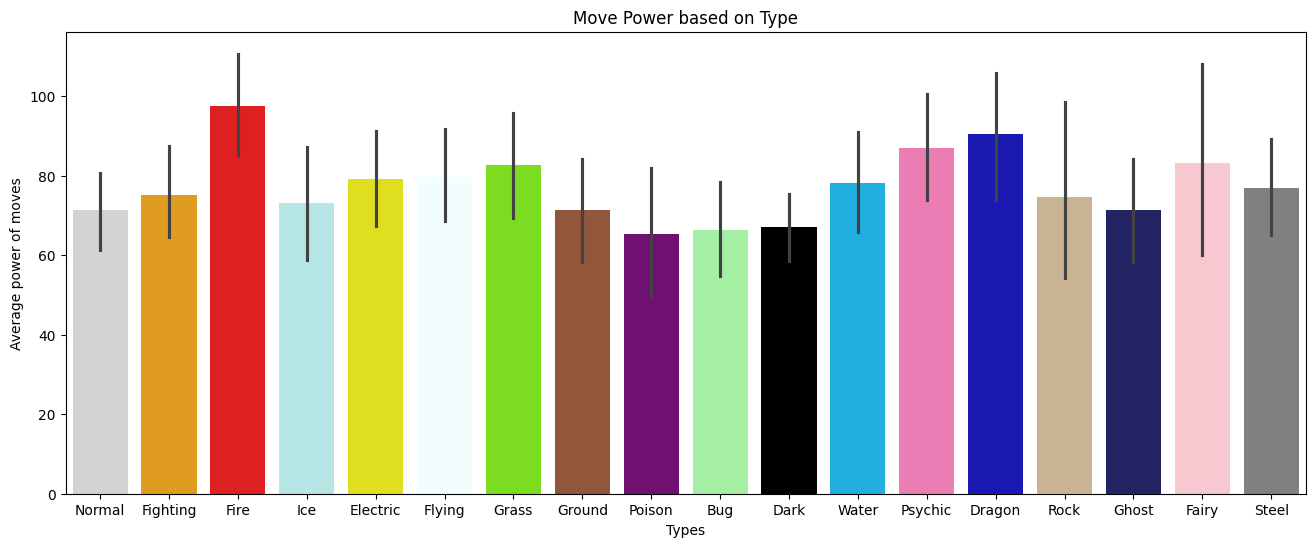

In [106]:
plt.figure(figsize=(16,6))
plt.ylabel('Average power of moves')
plt.xlabel('Types')
plt.title('Move Power based on Type')

datacolor = ['lightgray','orange','red','paleturquoise','yellow','azure','lawngreen','sienna','purple','palegreen','black','deepskyblue','hotpink','mediumblue','tan','midnightblue','pink','gray']

sns.barplot(x= 'type', y='power', data=df, palette=datacolor)


In [19]:
df_sorted = df.sort_values(by='power', ascending=False).pp


<Axes: xlabel='Types', ylabel='Average power of moves'>

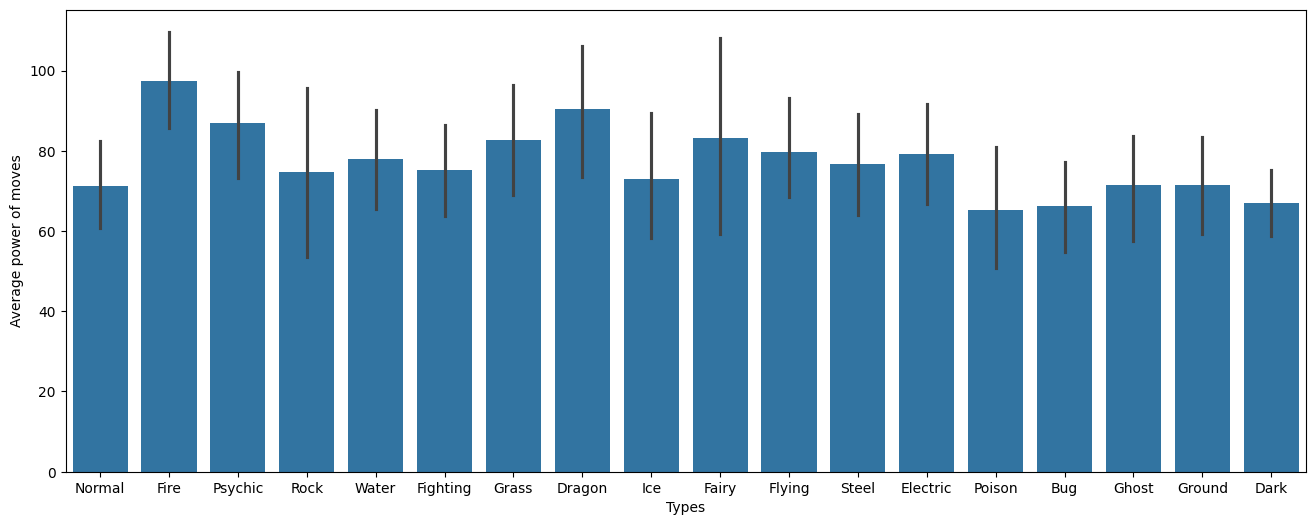

In [20]:
plt.figure(figsize=(16,6))
plt.ylabel('Average power of moves')
plt.xlabel('Types')

datacolor = ['lightgray','orange','red','paleturquoise','yellow','azure','lawngreen','sienna','purple','palegreen','black','deepskyblue','hotpink','mediumblue','tan','midnightblue','pink','gray']

sns.barplot(x= 'type', y='power', data=df, order=df.sort_values('power', ascending = False).type)

In [21]:
df.head()

,index,name,type,category,contest,pp,power,accuracy,generation,Efficiency
0,1,Pound,Normal,Physical,Tough,35,40.0,100.0,1,1.142857
1,2,Karate Chop,Fighting,Physical,Tough,25,50.0,100.0,1,2.000000
2,3,Double Slap,Normal,Physical,Cute,10,15.0,85.0,1,1.500000
3,4,Comet Punch,Normal,Physical,Tough,15,18.0,85.0,1,1.200000
4,5,Mega Punch,Normal,Physical,Tough,20,80.0,85.0,1,4.000000


In [71]:
df_gen1 = df[df['generation'] == 1]
df_gen4 = df[df['generation'] == 4]
df_gen7 = df[df['generation'] == 7]
df_sortedbypower = df

C:\Users\Akash\AppData\Local\Temp\ipykernel_18008\3993397212.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'generation', y='power', data=df, palette= "rainbow")


<Axes: title={'center': 'Move Power based on Generation'}, xlabel='Generations', ylabel='Average power of moves'>

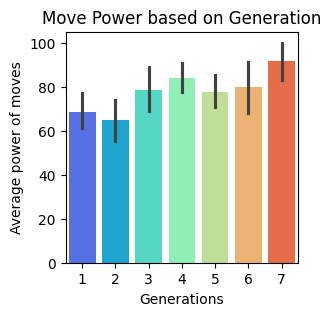

In [107]:
plt.figure(figsize=(3,3))
plt.ylabel('Average power of moves')
plt.xlabel('Generations')
plt.title('Move Power based on Generation')

sns.barplot(x= 'generation', y='power', data=df, palette= "rainbow")

<Axes: title={'center': 'GEN 1'}, xlabel='Types', ylabel='Average power of moves'>

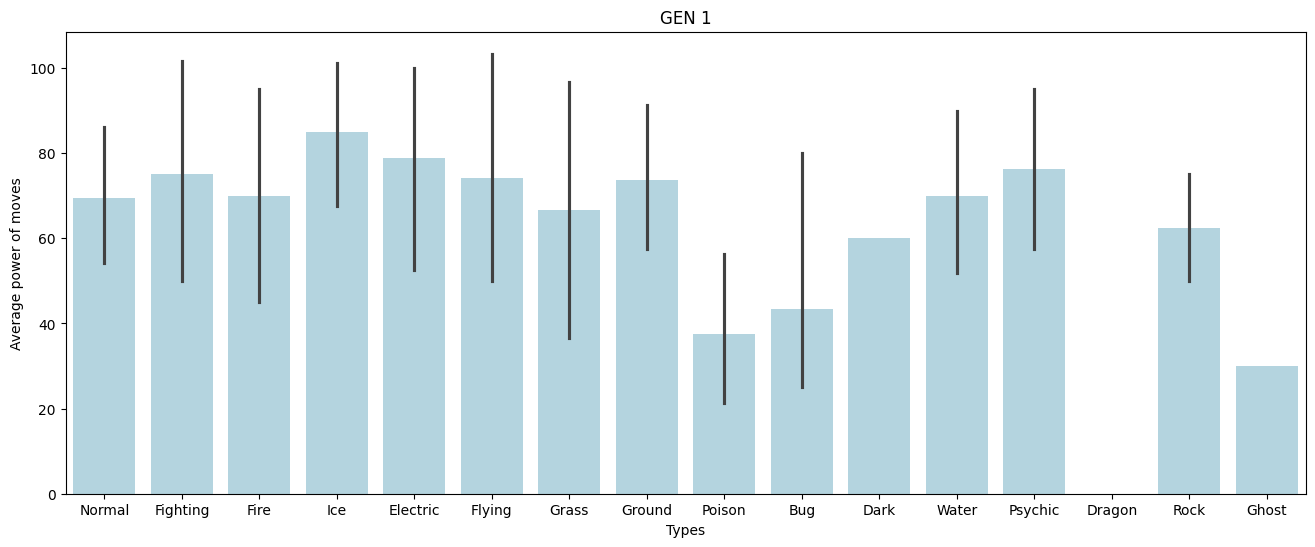

In [60]:
plt.figure(figsize=(16,6))

plt.ylabel('Average power of moves')
plt.xlabel('Types')
plt.title('GEN 1')

sns.barplot(x= 'type', y='power', data=df_gen1, color="lightblue")

<Axes: title={'center': 'GEN 4'}, xlabel='Types', ylabel='Average power of moves'>

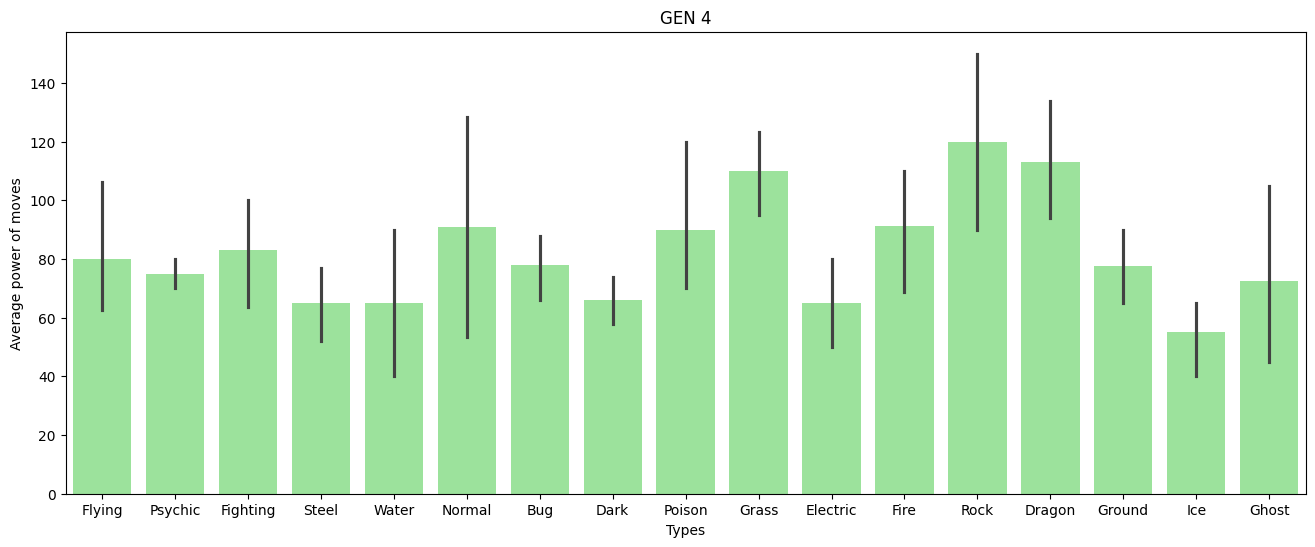

In [72]:
plt.figure(figsize=(16,6))
plt.ylabel('Average power of moves')
plt.xlabel('Types')
plt.title('GEN 4')

sns.barplot(x= 'type', y='power', data=df_gen4, color="lightgreen")

<Axes: title={'center': 'GEN 7'}, xlabel='Types', ylabel='Average power of moves'>

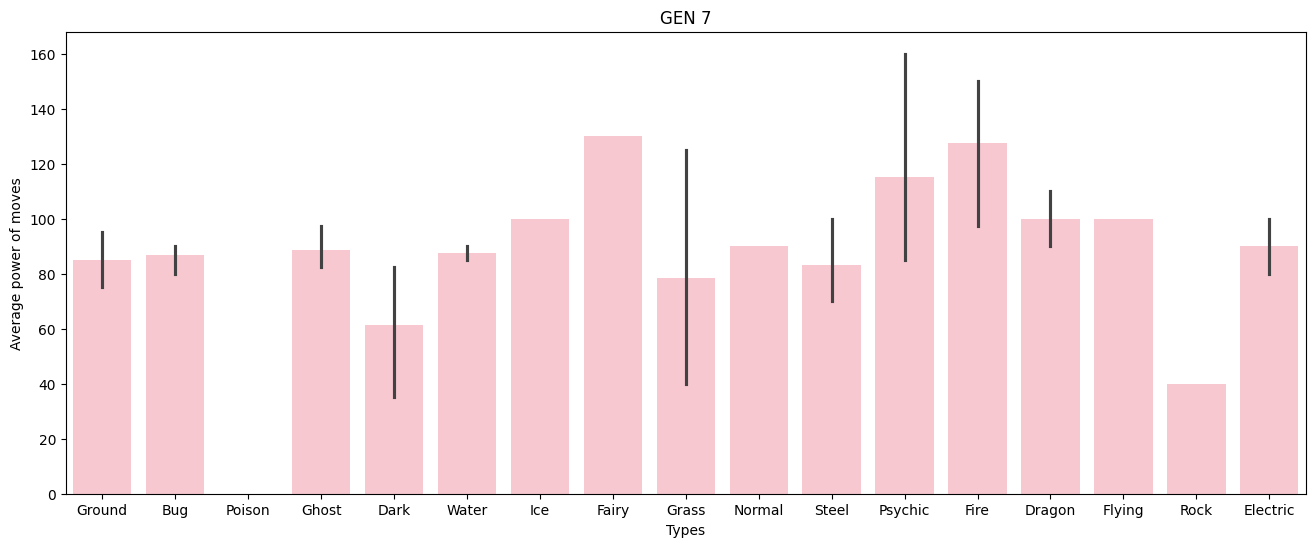

In [69]:
plt.figure(figsize=(16,6))
plt.ylabel('Average power of moves')
plt.xlabel('Types')
plt.title('GEN 7')

sns.barplot(x= 'type', y='power', data=df_gen7, color="pink")

In [26]:
df_sortedbypower.dropna(how='any') 
df_sortedbypower.sort_values(by=['power'])

,index,name,type,category,contest,pp,power,accuracy,generation,Efficiency
131,132,Constrict,Normal,Physical,Tough,35,10.0,100.0,1,0.285714
166,167,Triple Kick,Fighting,Physical,Cool,10,10.0,90.0,2,1.000000
139,140,Barrage,Normal,Physical,Cute,20,15.0,85.0,1,0.750000
2,3,Double Slap,Normal,Physical,Cute,10,15.0,85.0,1,1.500000
593,594,Water Shuriken,Water,Special,Cool,20,15.0,100.0,6,0.750000
...,...,...,...,...,...,...,...,...,...,...
684,685,Purify,Poison,Status,???,20,NaN,NaN,7,NaN
688,689,Instruct,Psychic,Status,???,15,NaN,NaN,7,NaN
693,694,Aurora Veil,Ice,Status,???,20,NaN,NaN,7,NaN
714,715,Tearful Look,Normal,Status,???,20,NaN,NaN,7,NaN


<Axes: title={'center': 'Scatterplot of Power vs PP'}, xlabel='Move Power', ylabel='Move PP'>

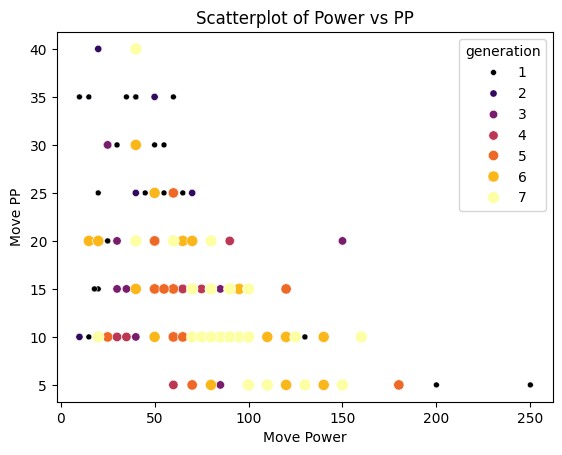

In [109]:
plt.xlabel('Move Power')
plt.ylabel('Move PP')
plt.title('Scatterplot of Power vs PP')

sns.scatterplot(data=df_sortedbypower, x="power", y="pp", size="generation", hue="generation", palette="inferno")

C:\Users\Akash\AppData\Local\Temp\ipykernel_18008\2552550872.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'category', y='power', data=df_nostatus, palette= "coolwarm_r")


<Axes: title={'center': 'All Moves'}, xlabel='Category', ylabel='Average power of moves'>

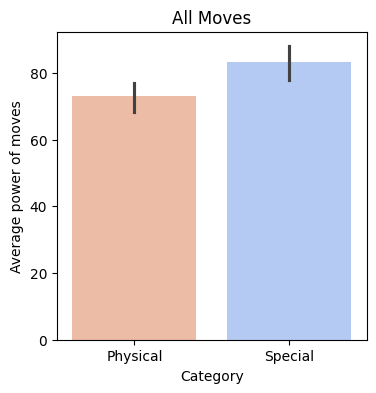

In [103]:
plt.figure(figsize=(4,4))
plt.ylabel('Average power of moves')
plt.xlabel('Category')
plt.title('All Moves')
df_nostatus = df[df.category != "Status"]

sns.barplot(x= 'category', y='power', data=df_nostatus, palette= "coolwarm_r")


<Axes: title={'center': 'Normal Specific'}, xlabel='Category', ylabel='Average power of moves'>

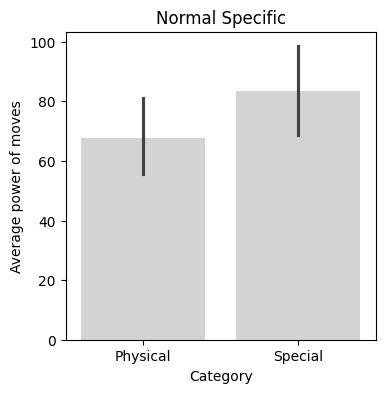

In [102]:
plt.figure(figsize=(4,4))
plt.ylabel('Average power of moves')
plt.xlabel('Category')
plt.title('Normal Specific Moves')
df_nostatus = df[df.category != "Status"]
df_nostatusn = df_nostatus[df_nostatus.type == "Normal"]

sns.barplot(x= 'category', y='power', data=df_nostatusn, color= "lightgray")


<Axes: xlabel='type'>

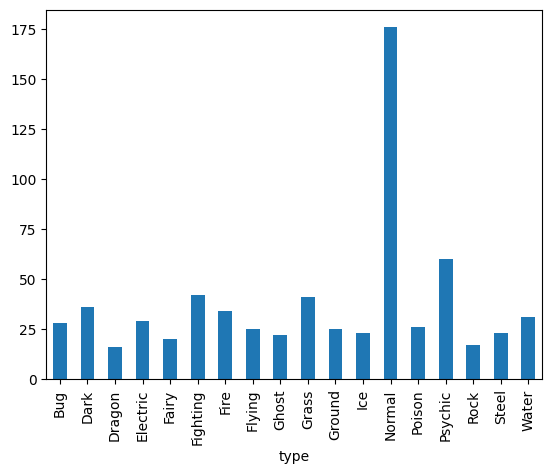

In [89]:
df.groupby('type').size().plot(kind='bar')